# Support Vector Machines - Explaining Hyper Parameters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

Datamiz fareler uzerinde yapilan bir deneyle ilgili. Once farelere med_1 ilaci enjekte ediliyor. 1 hafta sonra med_2 ilaci enjekte ediliyor. 2 hafta kadar beklendikten sonra farelerde hala virus olup olmadigi kontrol ediliyor.

Datamizdan herhangi bir prediction almayacagiz. Amacimiz; hyperparameter' lar datamizda ne gibi degisiklikler yapiyor bunlari gozlemleyecegiz.

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000,400.000,400.000
mean,5.448,5.617,0.500
std,2.319,2.337,0.501
min,1.000,1.000,0.000
25%,3.249,3.431,0.000
50%,5.394,5.638,0.500
75%,7.630,7.783,1.000
max,10.000,10.000,1.000


## Separating Hyperplane Manually

Asagidaki grafikte class'larin birbirinden cok iyi ayrildigini goruyoruz :

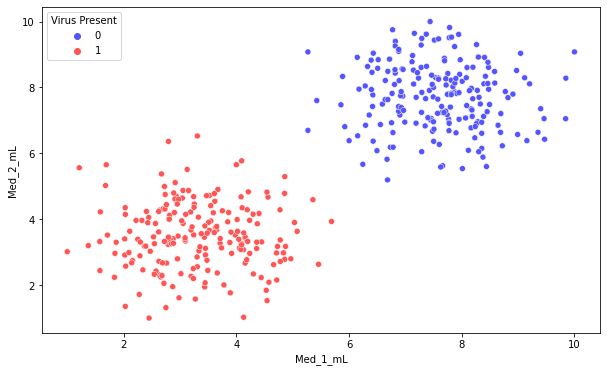

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic');

Asagidaki fonksiyonun amaci : 'Egimin -1, interceptin 11 oldugu linear bir dogru ciz.' x degerlerini 1 ile 10 arasinda verdik cunku datada med_1 ve med_2 sutunlari bu degerler arasinda.

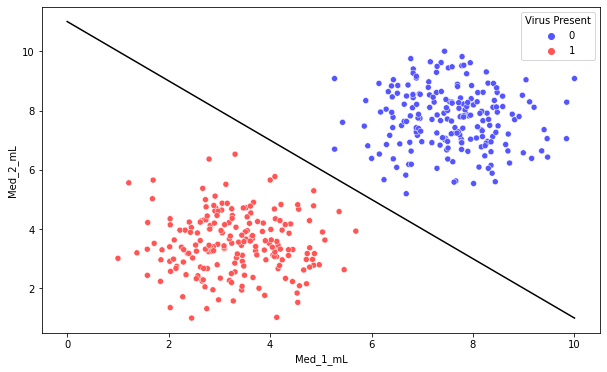

In [7]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black')

## SVM - Support Vector Machine

SVM de KNN gibi cok maliyetli bir modeldir. Bu yuzden icine farkli degerler verip gozlemlemek cok mumkun degildir.

SVM' nin iki cesidi var :

1- Support Vector Classification (SVC) : Class' lari ayirmak icin kullanilir.

2- Support Vector Machine for Regression (SVR) : Continuous verilerde kullanilir. SVM' nin bu metodu pek kullanilmaz cunku iyi sonuclar vermez. Regresyonda cok daha iyi sonuclar veren modeller tercih edilir.

Biz bu datada class' lari ayirmak istedigimiz icin SVC metodunu kullanacagiz.

In [8]:
from sklearn.svm import SVC     

Asagidaki kod ile SVC icindeki hyperparameter' lari gorebiliriz :

In [9]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

SVC PARAMETERS : 

C --------> LinearRegression' daki alpha ile ters orantili calisir. Hataya ne kadar tolerans gosterecegimizi bu parametre ile ayarlariz. Default = 1.
(C kuculdukce uyguladigi regularization artar. Ayni LogisticRegression'da oldugu gibi). 

!!!!! Kucuk C overfitting' den kurtarir. !!!!!!

C buyukse Hard Margin (overfitting durumu); C kucukse Soft Margin (underfitting durumu)

KERNEL -----------> kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'},    default = 'rbf'

Eger data linear degilse, classlar icinde ic ice gecmis bir durum varsa ona gore uygun kernel secimi yapilir.

Modelin SVM olarak secilmesi, ic ice gecmis datalarda gundeme geliyor. Kernel burada bir trick uygulayarak datayi bir ust boyuta tasiyor (1D' den 2D' ye veya 2D' den 3D' ye). Bu sekilde class' lar birbirinden kolay bir sekilde ayriliyor.

'rbf' en iyi sonuclari verdigi icin en cok tercih edilen kernel. 'sigmoid' daha cok deep learning modellerinde kullanilir.

Hangi kernel' i sececegimize karar vermek icin modelimizi GridSearch'e sokacagiz ve e bizim icin en iyisi kernel' i bulacak.

DEGREE -------> Butun kernel' lar icin default = 1 olarak gorev yapar. Sadece kernel = 'poly' secildigi anda degree' nin ust degerleri devreye girer ve bu parametre ile oynayabiliriz. Diger butun durumlarda degree = 1' dir.

GAMMA -------> {'scale', 'auto'} or float, default='scale'

Cizilen margin' in alanini belirler. Gamma arttikca complexity artar. Sadece nonlinear datalarda kullanilir. 

!!!!!! Linear datalarda sadece C parametresine bakilir !!!!!!

!!!!!! Nonlinear datalarda hem C hem de gamma degerlerine bakilir. !!!!!!

!!!!!! C ile hata oranina, gamma ile ise margin sinirlarina karar verilir. Ikisinin de olabilecek en kucuk degerlerini istiyoruz !!!!!!!

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [10]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

Once asagida SVC modelimizi tanimlayip default degerler ile skorlarimiza bakacagiz :

In [11]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

svm_margin_plot isimli bir fonksiyonu baska bir pyton dosyasi icinde tanimladik. Cizdigimiz sinirlari gosteren bu fonksiyonu asagida import ediyoruz. SVM gorsellestirmelerinde bu fonksiyonu kullanacagiz (Fonksiyon icerigi onemli degil).

Asagidaki import isleminde sunu dedik : "svm_margin_plot dosyasindan tanimlamis oldugum plot_svm_boundary fonksiyonunu import et."

Fonksiyondaki C ve gama degerlerini degistirerek cizimlerin nasil degistigini gozlemlemis olacagiz.

In [12]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

Asagidaki gorselde kesikli cizgi uzerinde olan degerleri yuvarlak icine almis; cizgileri bu degerlere dayanark cizdi. Bu noktalara "support" denir.

Ortaya cizilen cizgi "hyperline" olarak adlandirilir ve bu line, support noktalarina olan en iyi uzakliktir.

Iki kesikli cizgi arasinda kalan uzunluga "margin" denir ve bu margin araligini C degeri belirler.

C kuculdukce margin araligi artar (Yani hataya izin verir, Soft Margin durumu).

!!!! C' yi kucult, hataya izin ver, C' yi buyut hataya izin verme !!!!

C kuculdukce uygulanan regularization (ceza ekleme islemi) artar, hataya izin verir. 

Yani C parametresinin buradaki gorevi, modele  bias (hata) ekleyerek train setteki tahminleri kotulestirip test setteki tahminleri iyilestirmis oluyoruz.

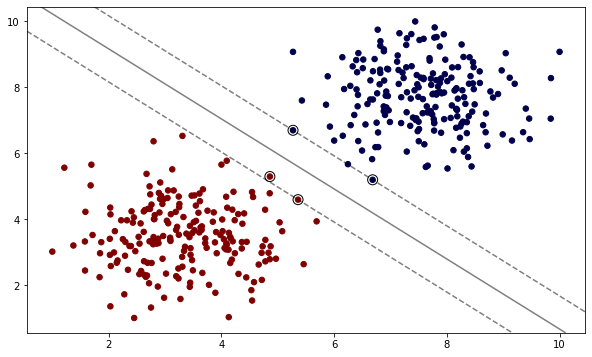

In [13]:
plot_svm_boundary(model,X,y)

!!!!!! Scale islemi bu modelde de cok onemli cunku unbalance durumlarda bazi feature' lara fazla agirlik verebilir. Bu da tahminlerimizi yaniltir. !!!!!!

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [14]:
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

SVC(C=0.01, kernel='linear')

Asagidaki grafikte C degerini kuculttugumuzde margin araliginin genisledigini ve hatalara daha toleransli olundugunu goruyoruz (Soft Margin) :

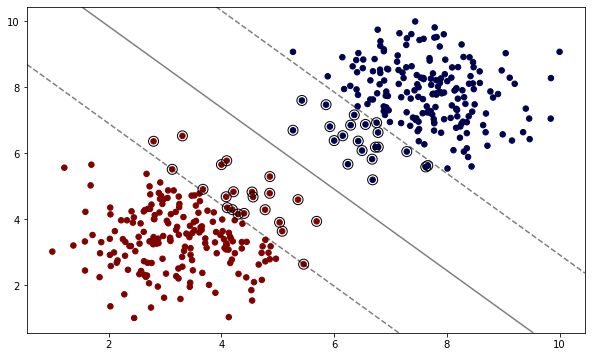

In [15]:
plot_svm_boundary(model,X,y)

### Kernel

Kernel Function is a method used to take data as input and transform into the required form of processing data. “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. Basically, It returns the inner product between two points in a standard feature dimension.

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Yukaridaki grafikte SVM metodu ile linear datalara nasil bakilacagini gormustuk. Simdi asagida nonlinear datalarda bu model nasil kullanilir onu gorelim (Su anda kullandigimiz data linear bir data, biz isleyisi gormek adina nonlinear duruma bakiyoruz).

Once default C ve gamma degerleriyle grafigimizi cizelim :

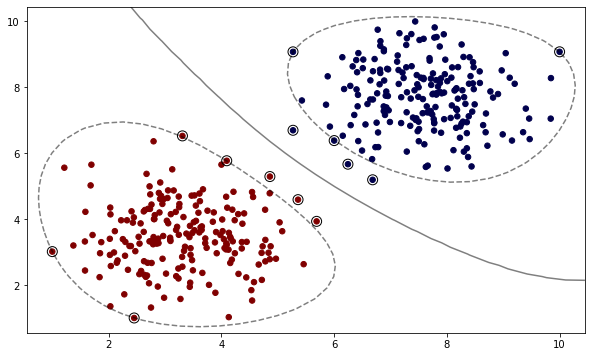

In [16]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model,X,y)

Gamma degeri yukarida kesikli cizgilerin sinirlarini belirler. Gamma' nin cizdigi sinirlarin disinda kalan alanlarin hepsi 'margin' olur. Cunku artik 2. boyuttan 3. boyuta gectik. Gamma sinirlari disinda kalan her noktayi modelimiz yanlis tahmin edecek demektir.

Gamma degeri buyudukce overfitting durumu ortaya cikar (C degerindeki durum ile ayni)

Gamma cok buyuk olmadigi surece kontrol C' dedir. Ama gamma buyudukce kontrol gammaya gecer. Bu durumda C parametresi buyuse de kuculse de overfitting durumu devam eder. Bu yuzden C ve gammanin birbirini dengeledigi durumu bulmak gerekir ki bunu da GridSearch bizim yerimize yapar.

!!!!!! C ve gamma kuculdukce uygulanan regularization artar !!!!!! (Cok buyumelerini istemiyoruz, buyurlerse model overfitting' e gider.)

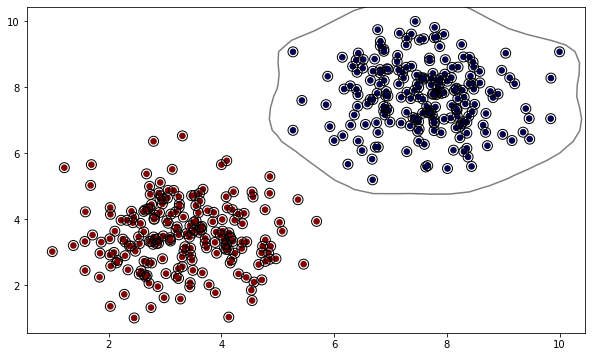

In [17]:
model = SVC(kernel='rbf', C=0.01, gamma=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

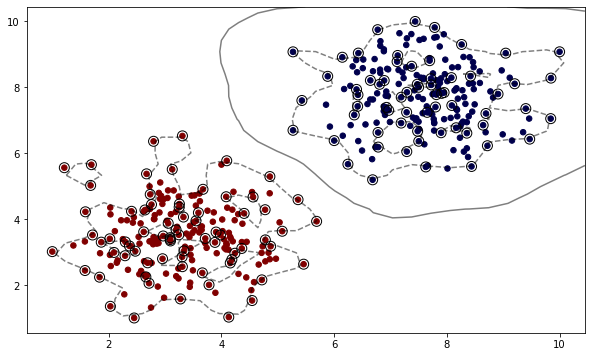

In [18]:
model = SVC(kernel='rbf', C=10, gamma=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

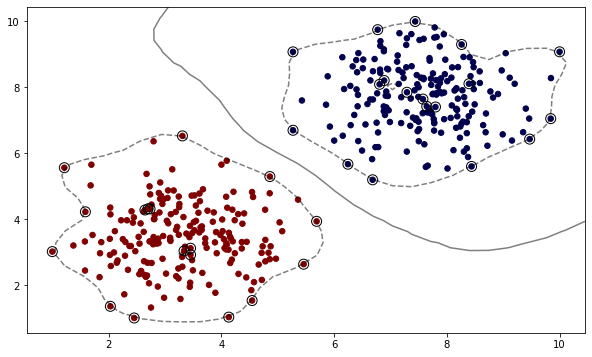

In [19]:
model = SVC(kernel='rbf', C=10, gamma=0.5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

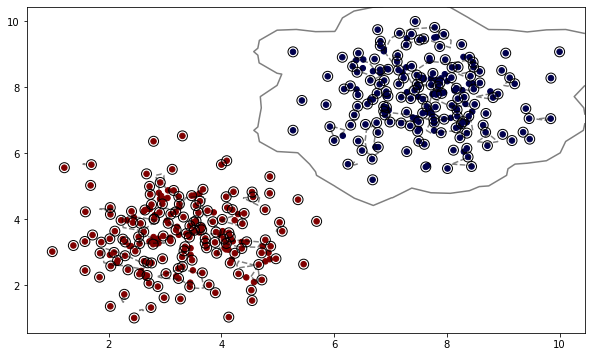

In [20]:
model = SVC(kernel='rbf', C=1, gamma=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

The sigmoid kernel was quite popular for support vector machines due to its origin
from neural networks. Although it is known that the kernel matrix may not be positive
semi-definite (PSD), other properties are not fully studied. In this paper, we discuss
such non-PSD kernels through the viewpoint of separability. Results help to validate
the possible use of non-PSD kernels. One example shows that the sigmoid kernel matrix
is conditionally positive definite (CPD) in certain parameters and thus are valid kernels
there. However, we also explain that the sigmoid kernel is not better than the RBF kernel
in general

Default kernel degeri olan "rbf" yerine "sigmoid" koyarak sonuclari gozlemleyelim :

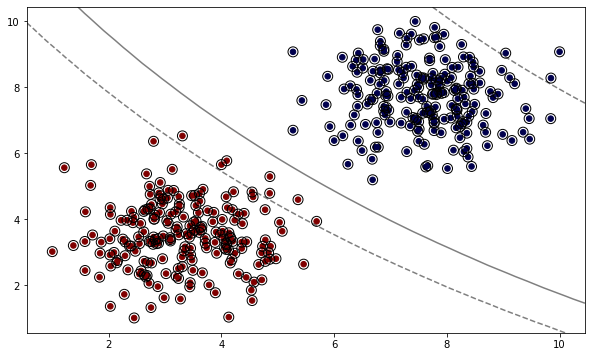

In [21]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

Sigmoid' in cok anlamsiz cizgiler cizdigini goruyoruz. Bu modelde isimize yaramaz.

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

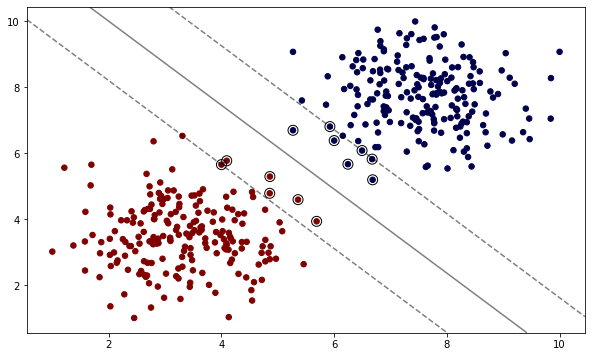

In [22]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

kernel = 'poly' olarak sectigimizde degree ile oynayabiliyorduk. Asagida degree' yi artirdikca kernel' in egilmeye basladigini goruyoruz:

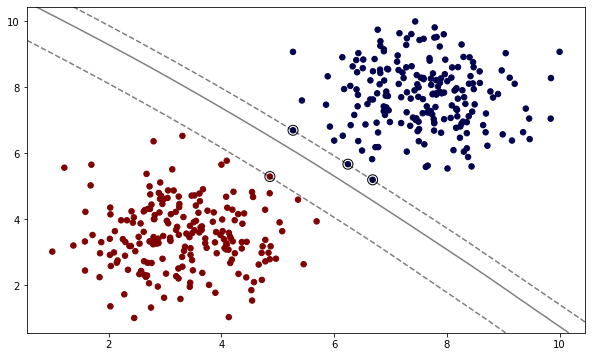

In [23]:
model = SVC(kernel='poly', C=1, degree=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

Degree cok buyudugunde line ortadan kayboldu. Bu yuzden bu parametrelerin dengesini ayarlamak onemli.

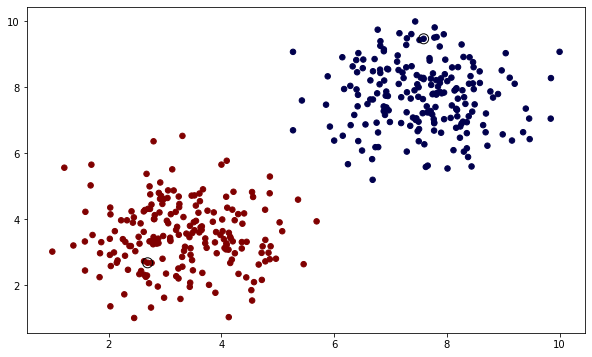

In [24]:
model = SVC(kernel='poly', C=1, degree=100)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [25]:
from sklearn.model_selection import GridSearchCV

Asagida istedigimiz C degerlerini, tum kernel ve gamma parametrelerini ve degree' yi tanimlayarak GridSearch' un tum olasiliklari denemesini ve best_score' lari bulmasini isteyecegiz :

In [26]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid)

In [27]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [28]:
grid.best_score_

1.0

In [29]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

This is more to review the grid search process, recall in a real situation such as your exercise, you will perform a train|test split and get final evaluation metrics.